In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

### Кластеризация k-means

In [2]:
from sklearn.cluster import KMeans

In [3]:
model = KMeans(n_clusters=3, random_state=100)

функция для создания учебного датасета

In [4]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([
        [3, 3],
        [6, 9],
        [9, 3]
    ])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]}, columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

In [5]:
train = make_data(10, 42)
test = make_data(10, 27)

Text(0.5, 1.0, 'train')

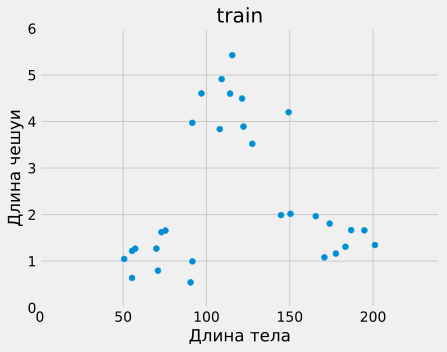

In [6]:
plt.scatter(train['x'], train['y'])
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('train')

Нормализация данных

In [7]:
 from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=['x', 'y'])


Text(0.5, 1.0, 'train')

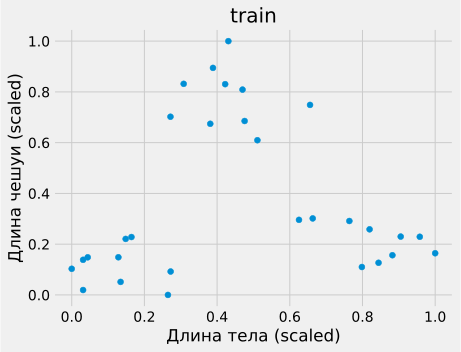

In [10]:
plt.scatter(train_scaled['x'], train_scaled['y'])
plt.xlabel('Длина тела (scaled)')
plt.ylabel('Длина чешуи (scaled)')
plt.title('train')

Построение модели кластеризации

In [11]:
train_lables = model.fit_predict(train_scaled)
train_lables

/home/sk/jupyter_projects/gb_Python_DS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 0, 1, 1], dtype=int32)

Координаты центров кластеров (в нормализованном виде)

In [12]:
model.cluster_centers_

array([[0.4314873 , 0.77857028],
       [0.12190576, 0.11495728],
       [0.82595794, 0.21634417]])

Координаты центров кластеров (в изначальном масштабе)

In [13]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[115.56312871,   4.34494667],
       [ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071]])

Text(0.5, 1.0, 'train')

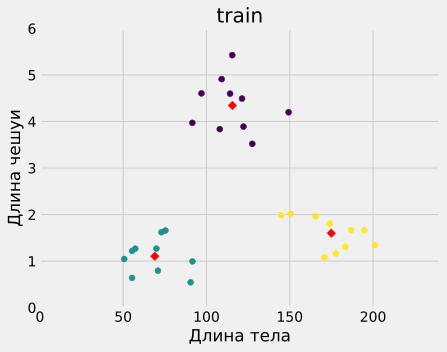

In [14]:
plt.scatter(train['x'], train['y'], c=train_lables)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('train')

### Inertia

In [16]:
model.inertia_

0.5417377477488046

Как меняется Inertia в зависимости от количества кластеров

In [17]:
inertia_arr = []

In [19]:
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    print(temp_model.inertia_)
    inertia_arr.append(temp_model.inertia_)
    

/home/sk/jupyter_projects/gb_Python_DS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sk/jupyter_projects/gb_Python_DS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sk/jupyter_projects/gb_Python_DS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sk/jupyter_projects/gb_Python_DS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

2.9002641632095463
0.5417377477488046
0.4281736891174851
0.3258659915567972
0.26736166193637667
0.20725794455977645
0.16774172223409056
0.14671272476076846


/home/sk/jupyter_projects/gb_Python_DS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Inertia')

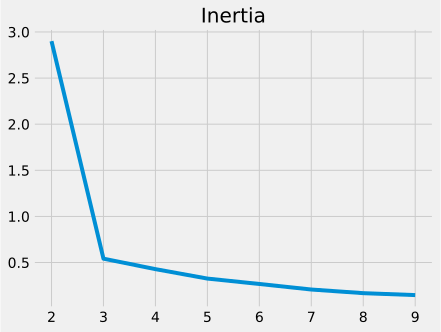

In [20]:
plt.plot([i for i in range(2, 10)], inertia_arr)
plt.title('Inertia')

#### Отнесение примеров из тестового датасета к определенному кластеру

In [22]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [23]:
test_lables = model.predict(test_scaled)

In [24]:
test_lables

array([1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1,
       2, 2, 1, 0, 0, 1, 0, 2], dtype=int32)

Text(0.5, 1.0, 'Test')

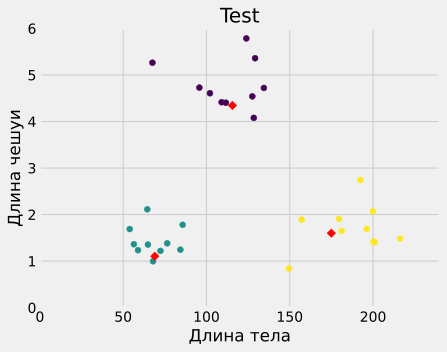

In [25]:
plt.scatter(test['x'], test['y'], c=test_lables)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')

### Агломеративный кластеринг

In [27]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
model = AgglomerativeClustering(n_clusters=3)

In [29]:
train_lables = model.fit_predict(train_scaled)

In [30]:
train_lables

array([0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2,
       1, 1, 0, 0, 0, 2, 1, 1])

Text(0.5, 1.0, 'Test')

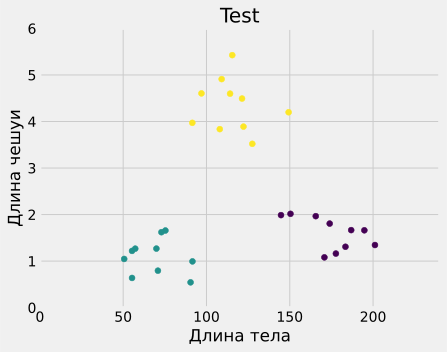

In [32]:
plt.scatter(train['x'], train['y'], c=train_lables)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)

In [35]:
knn.fit(train_scaled, train_lables)

KNeighborsClassifier()

In [36]:
test_lables = knn.predict(test_scaled)

In [37]:
test_lables

array([1, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 2, 0])

Text(0.5, 1.0, 'Test')

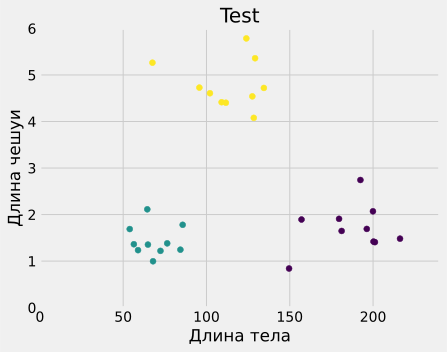

In [38]:
plt.scatter(test['x'], test['y'], c=test_lables)
plt.xlim(0, 240)
plt.ylim(0, 6)
plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')